In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import os
import functions as F

### Investigating volume ratios as dimensionality increases

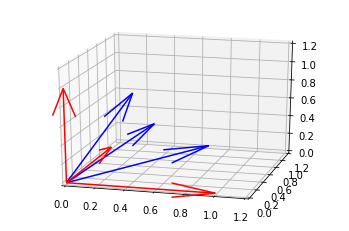

In [123]:
X, Y, Z, U, V, W = zip(*np.concatenate((np.zeros((3, 3)), F.make_matrix(3, np.pi/2)), axis=1))
a, b, c, d, e, f = zip(*np.concatenate((np.zeros((3, 3)), F.make_matrix(3, np.pi/3)), axis=1))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, color='red')
ax.quiver(a, b, c, d, e, f, color='blue')
ax.view_init(azim=-75, elev=20)
ax.set_xlim([0, 1.2])
ax.set_ylim([0, 1.2])
ax.set_zlim([0, 1.2])
# plt.show()

plt.savefig('images/paralelipiped.png', dpi = 500)

In [13]:
def calculate_volumes(factor, dimensions):
    volume_data = pd.DataFrame()
    for side_len in np.linspace(1, 0.0, 10):
        for n_dim in [1, 2, 4, 6, 7, 10]:
            ref_vol = np.linalg.det(F.make_matrix(n_dim, factor * np.pi/2, 1.0))
            l_vol = np.linalg.det(F.make_matrix(n_dim, factor * np.pi/2, side_len))
            row_df = pd.DataFrame(np.transpose([[side_len], [n_dim], [l_vol/ref_vol]]))
            volume_data = volume_data.append(row_df, ignore_index=True)
    volume_data.columns = columns = ['side_len', 'n_dim', 'volume']
    return volume_data

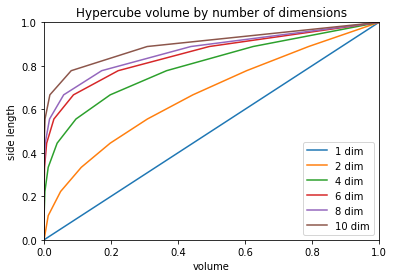

In [45]:
dimensions = [1, 2, 4, 6, 8, 10]
volumes_no_corr = calculate_volumes(1.0, dimensions)
volumes_no_corr.set_index('volume', inplace=True)
volumes_no_corr.groupby('n_dim')['side_len'].plot(ylim=(0.0, 1.0))
plt.ylabel('side length')
plt.legend([str(i) + ' dim' for i in dimensions])
plt.title("Hypercube volume by number of dimensions")
plt.savefig('images/volume_ratio_by_ndim.png', dpi=500)

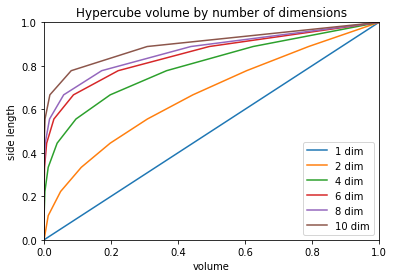

In [150]:
volumes_corr = calculate_volumes(0.1, dimensions)
volumes_corr.set_index('volume', inplace=True)
volumes_corr.groupby('n_dim')['side_len'].plot(ylim=(0.0, 1.0))
plt.ylabel('side length')
plt.legend([str(i) + ' dim' for i in dimensions])
plt.title("Hypercube volume by number of dimensions")
plt.savefig('images/volume_ratio_by_ndim.png', dpi=500)

### COD in simulated data

#### Count datapoints in boxes of different length

In [ ]:
data_dir = 'data/'
rows = []
for filename in os.listdir(data_dir):
    if filename.startswith('frank') and filename.endswith(".csv"):
        data = pd.read_csv(data_dir + filename)
        theta, dims = parse_params_from_file(filename)
        for box_side in np.arange(0.1, 1.0, 0.1):
            count = F.count_in_box(data, box_side)
            row = {'n_dim': dims, 'tau': theta, 'box_side': box_side, 'count': count}
            rows.append(row)
        print(filename)
count_data = pd.DataFrame(rows)
count_data.to_csv('data/counts.csv', index=False, float_format='%.2f')

#### Compute minimal/maximal distances to origin for each norm order and each simmulated dataset

In [ ]:
data_dir = 'data/'
rows = []
for filename in os.listdir(data_dir):
    if filename.startswith('frank') and filename.endswith(".csv"):
        data = pd.read_csv(data_dir + filename)
        theta, dims = F.parse_params_from_file(filename)
        for norm_order in [0.25, 0.5, 0.75, 1, 2, 3, 4]:
            min_dist, max_dist = make_norms(data, norm_order)
            row = {'n_dim': dims, 'theta': theta, 'min_dist': min_dist, 'max_dist': max_dist, 'norm_order': norm_order}
            rows.append(row)
            print(filename + ' ' + str(norm_order))
        
norm_data = pd.DataFrame(rows)
norm_data['contrast'] = (norm_data['max_dist'] - norm_data['min_dist']) / norm_data['min_dist']
norm_data.to_csv('data/norms.csv', index=False)

In [28]:
norm_data = pd.read_csv('data/norms.csv')
orders = sorted(norm_data['norm_order'].unique())
for theta in [0.25, 0.5, 0.75, 2, 4, 6, 8, 10, 12, 16, 20]:
    theta_sorted = norm_data[(norm_data['tau'] == theta) & (norm_data['n_dim'] <= 50)].sort_values(by=['n_dim'])
    theta_sorted.set_index('n_dim', inplace=True)
    theta_sorted.groupby('norm_order')['contrast'].plot(logy=True, ylim=(theta_sorted['contrast'].min(), 1100))
    plt.title('Contrasts by metric order for theta: ' + str(theta))
    plt.legend([str(i) for i in orders])
    plt.ylabel('log contrast')
    plt.savefig('images/contrast_by_ndim_frank_theta_' + str(theta) + '.png', dpi=500)
    plt.close()

#### Volume ratios by number of dimensions and theta parameter

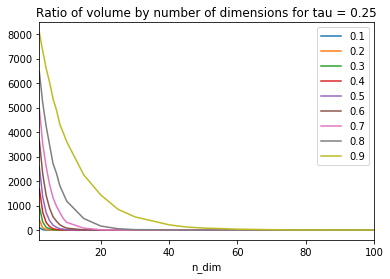

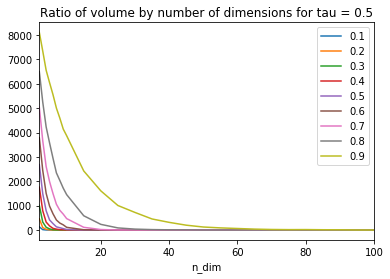

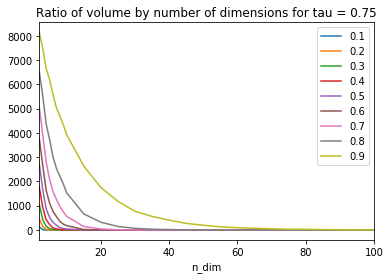

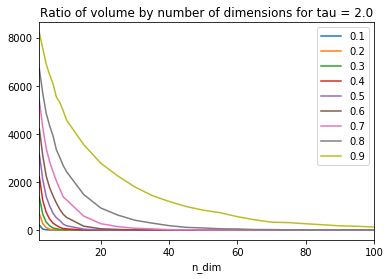

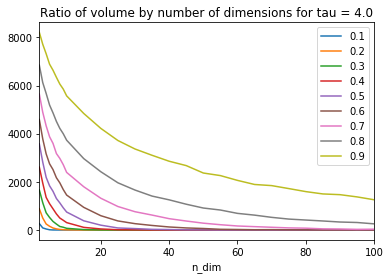

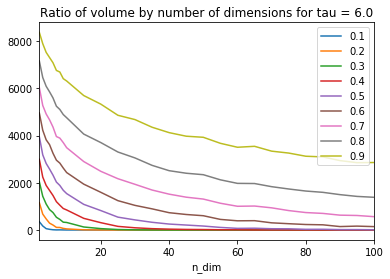

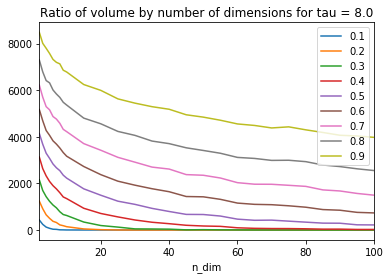

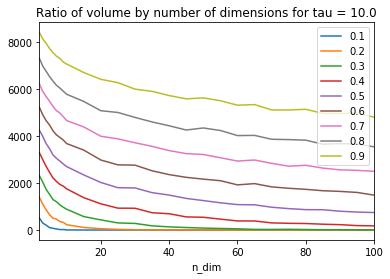

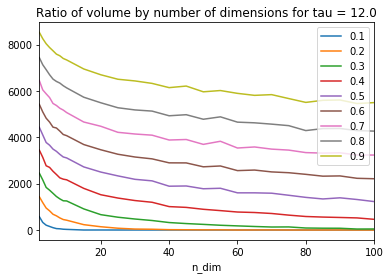

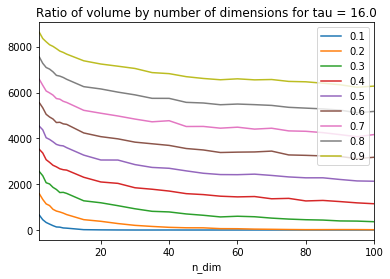

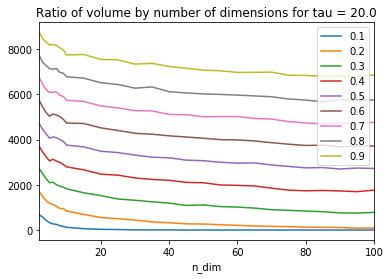

In [3]:
count_data = pd.read_csv('data/counts.csv')
for tau in sorted(count_data['tau'].unique()):
    tau_sorted = count_data[count_data['tau'] == tau].sort_values(by=['n_dim'])
    tau_sorted.set_index('n_dim', inplace=True)
    tau_sorted.groupby('box_side')['count'].plot(legend=True)
    plt.title('Ratio of volume by number of dimensions for tau = ' + str(tau))
    plt.show()

In [10]:
count_data = pd.read_csv('data/counts.csv')
count_data['volume'] = count_data['count'] / 10000
count_data.set_index('volume', inplace=True)

In [43]:
count_data_dims = [2, 4, 6, 8, 10, 20, 50, 75, 100]

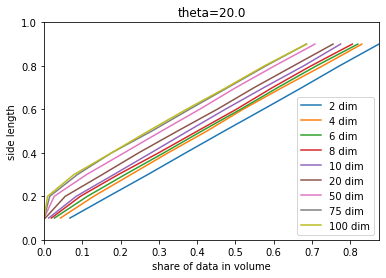

In [66]:
theta = 20.0
count_data[(count_data['tau'] == theta) & (count_data['n_dim'].isin(count_data_dims))].groupby('n_dim')['box_side'].plot(ylim=(0.0, 1.0))
plt.ylabel('side length')
plt.xlabel('share of data in volume')
plt.legend([str(i) + ' dim' for i in count_data_dims])
plt.title("theta=" + str(theta))
plt.savefig('images/volume_ratio_by_ndim_frank_theta_' + str(theta) + '.png', dpi=500)

In [ ]:
tau_sorted = count_data[(count_data['box_side'] == 0.9) & (count_data['n_dim'] <= 50)].sort_values(by=['n_dim'])
# tau_sorted = tau_sorted[tau_sorted['tau'].isin([0.1, 0.9])]
tau_sorted.set_index('n_dim', inplace=True)
tau_sorted.groupby('tau')['count'].plot(legend=True)